Path Sum: Two Ways
---


In [1]:
import numpy as np
matrix = '''
131 673 234 103 18
201 96 342 965 150
630 803 746 422 111
537 699 497 121 956
805 732 524 37 331
'''
example_grid = np.array(matrix.split()).reshape((5,5)).astype(int)
example_grid

array([[131, 673, 234, 103,  18],
       [201,  96, 342, 965, 150],
       [630, 803, 746, 422, 111],
       [537, 699, 497, 121, 956],
       [805, 732, 524,  37, 331]])

In [2]:
# create a grid representing motions from one square to the next,either
#to the right or down. An N x N grid should have N x (N-1) of these.

right_paths = np.full((5,4),1)
down_paths = np.full((4,5),1)
right_paths, down_paths

(array([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]),
 array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]))

From 121, you'd never go right instead of down.

In [3]:
right_paths[3,3] = 0
down_paths[3,3] = 0
right_paths, down_paths

(array([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 0],
        [1, 1, 1, 1]]),
 array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1]]))

Maybe best to work with a graph.

In [4]:

import networkx as nx

In [5]:
nodes = np.stack(np.indices((5,5)), axis = 2).reshape((-1,2))

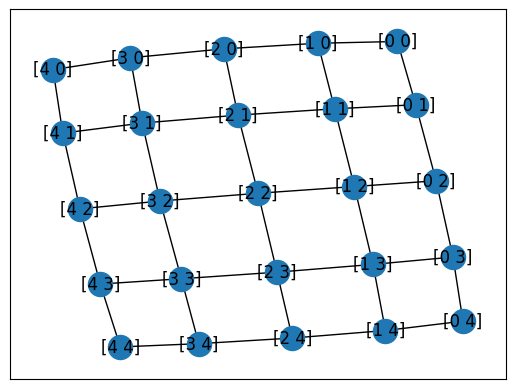

In [6]:
edges = []
for node1 in nodes:
    for node2 in nodes:
        #make rights
        if node1[0] == node2[0] and node1[1] + 1 == node2[1]:
            edges.append([node1, node2])
        #make downs
        if node1[0] + 1 == node2[0] and node1[1] == node2[1]:
            edges.append([node1, node2])

edges = list(map( lambda x: [str(x[0]), str(x[1])], edges))


string_nodes = np.unique(np.array(edges)).reshape(-1)

g = nx.from_edgelist(edges)




nx.draw_networkx(g)

In [7]:
def string_list_to_real(the_string):
    return eval(','.join(the_string.split()))

positions = list(map( string_list_to_real, string_nodes))
positions = [ [x, -y] for x,y in positions ]
positions = dict(zip(string_nodes, positions))
positions

{'[0 0]': [0, 0],
 '[0 1]': [0, -1],
 '[0 2]': [0, -2],
 '[0 3]': [0, -3],
 '[0 4]': [0, -4],
 '[1 0]': [1, 0],
 '[1 1]': [1, -1],
 '[1 2]': [1, -2],
 '[1 3]': [1, -3],
 '[1 4]': [1, -4],
 '[2 0]': [2, 0],
 '[2 1]': [2, -1],
 '[2 2]': [2, -2],
 '[2 3]': [2, -3],
 '[2 4]': [2, -4],
 '[3 0]': [3, 0],
 '[3 1]': [3, -1],
 '[3 2]': [3, -2],
 '[3 3]': [3, -3],
 '[3 4]': [3, -4],
 '[4 0]': [4, 0],
 '[4 1]': [4, -1],
 '[4 2]': [4, -2],
 '[4 3]': [4, -3],
 '[4 4]': [4, -4]}

In [8]:
positions

{'[0 0]': [0, 0],
 '[0 1]': [0, -1],
 '[0 2]': [0, -2],
 '[0 3]': [0, -3],
 '[0 4]': [0, -4],
 '[1 0]': [1, 0],
 '[1 1]': [1, -1],
 '[1 2]': [1, -2],
 '[1 3]': [1, -3],
 '[1 4]': [1, -4],
 '[2 0]': [2, 0],
 '[2 1]': [2, -1],
 '[2 2]': [2, -2],
 '[2 3]': [2, -3],
 '[2 4]': [2, -4],
 '[3 0]': [3, 0],
 '[3 1]': [3, -1],
 '[3 2]': [3, -2],
 '[3 3]': [3, -3],
 '[3 4]': [3, -4],
 '[4 0]': [4, 0],
 '[4 1]': [4, -1],
 '[4 2]': [4, -2],
 '[4 3]': [4, -3],
 '[4 4]': [4, -4]}

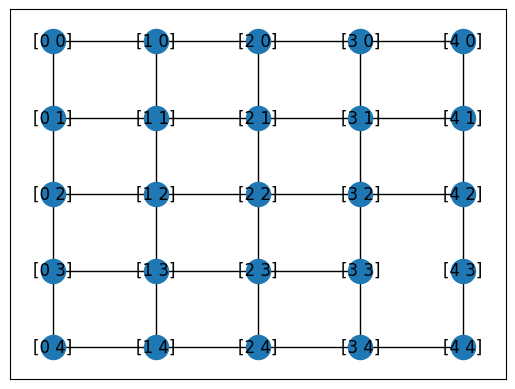

In [9]:
edges.remove(['[3 3]', '[4 3]'])
g = nx.from_edgelist(edges)
nx.draw_networkx(g, pos = positions)

In [10]:
121 + 37

158

In [11]:
111+ 956

1067

In [12]:
#at 422, one would choose to go down to 121

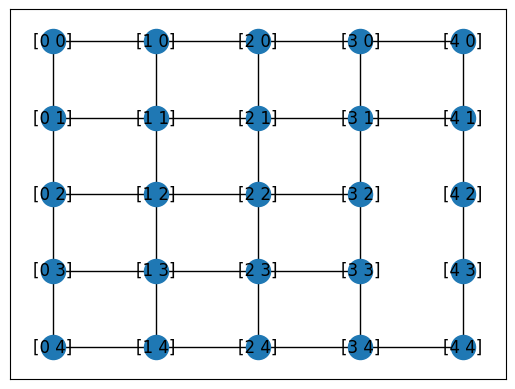

In [13]:
edges.remove(['[3 2]', '[4 2]'])
g = nx.from_edgelist(edges)
nx.draw_networkx(g, pos = positions)

In [14]:
121+37+422

580

In [15]:
956 + 111 + 150

1217

In [16]:
# at 965 one would choose to go down.

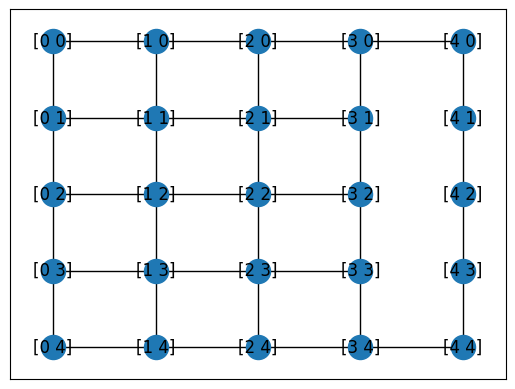

In [17]:
edges.remove(['[3 1]', '[4 1]'])
g = nx.from_edgelist(edges)
nx.draw_networkx(g, pos = positions)

In [18]:
121+37+422+103

683

In [19]:
956 + 111 + 150 + 18 

1235

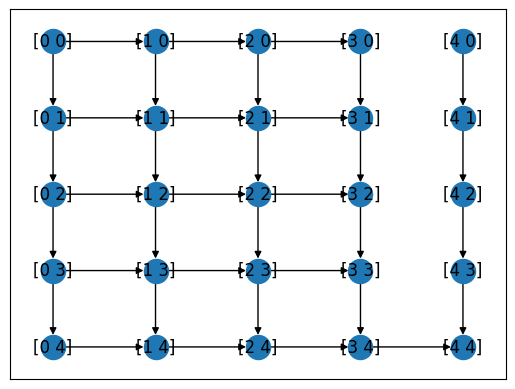

In [20]:
#at 103 one would choose to go down
edges.remove(['[3 0]', '[4 0]'])
g = nx.from_edgelist(edges, create_using=nx.DiGraph)
nx.draw_networkx(g, pos = positions)

In [21]:
# now we've broken off a huge collection of possibilites.

Game Plan:
    - look for lowest right rectangle.
    - figure out which way you'd go from the upper left to the lower right.
    - exclude the first thing in that path
    - if it was a right path, continue with the rectangle above.
    - if it was a left path, continue with the rectangle to the left.
    - these are equivalent to just picking the lowest right rectangle.

In [22]:
list(nx.all_simple_paths(g, '[3 0]', '[4 4]'))

[['[3 0]', '[3 1]', '[3 2]', '[3 3]', '[3 4]', '[4 4]']]

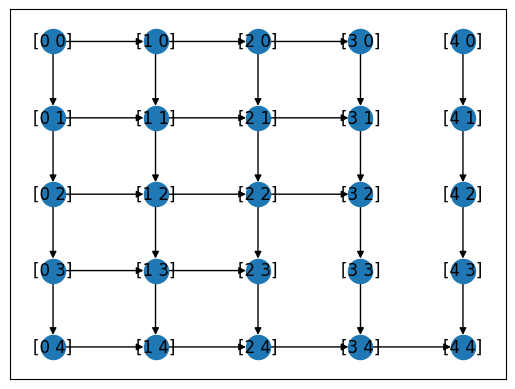

In [23]:
#you'd always go from 497 to 37 through 121.
edges.remove(['[2 3]', '[3 3]'])
g = nx.from_edgelist(edges, create_using=nx.DiGraph)
nx.draw_networkx(g, pos = positions)

In [24]:
# list(nx.all_simple_paths(g, '[2 2]', '[3 4]'))
list(nx.all_simple_edge_paths(g, '[2 2]', '[3 4]'))

[[('[2 2]', '[2 3]'), ('[2 3]', '[2 4]'), ('[2 4]', '[3 4]')],
 [('[2 2]', '[3 2]'), ('[3 2]', '[3 3]'), ('[3 3]', '[3 4]')]]

Send this to a dict of node:values to get the sums, and pick the first edge in the path with larger sum to remove.

Look for any node with only two paths to reach the end. Cut the first link of the worse path.

# Start from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [101]:
def node_x(node_string):
    return int(node_string.split()[0][1:])

def node_y(node_string):
    return int(node_string.split()[1][:-1])

def get_two_path_node_to_end(graph, grid_shape):
    """
    Gives the last node which has two and only two paths to the very
    last node.
    
    Parameters
    ----------
    graph : nx.DiGraph
    
    Returns
    -------
    node : str
    paths_to_end : list
    """
    looking_for_node = True
    nodes = list(graph.nodes)
    last_node = nodes[-1]
    for node in nodes[:-1:-1]:
        if looking_for_node:
            cutoff_length = sum(grid_shape)-node_x(node)-node_y(node)
            paths_to_end = list(nx.all_simple_paths(graph, node, last_node, cutoff = cutoff_length))
            if len(list(paths_to_end)) == 2:
                corner_node = node
                looking_for_node = False
                print(f'Found a node with two paths to the end: {node}')
        else:
            break
    if looking_for_node:
        return ([],[])
    return corner_node, paths_to_end

def get_costs_of_paths(paths, costs:dict):
    the_sums = []
    for path in paths:
        # the_sums.append(
        #     sum(
        #         [ costs[node] for node in path ]
        #     )
        # )
        the_sums.append(get_cost_of_path(path, costs))
    return the_sums

def get_cost_of_path(path, costs:dict):
    return sum([ costs[node] for node in path ])

def get_min_cost_path(paths, costs, return_argument = False):
    these_paths_costs = get_costs_of_paths(paths, costs)
    min_path_no = np.argmin(these_paths_costs)
    if return_argument:
        return min_path_no
    else:
        return paths[min_path_no]

    
def get_max_cost_path(paths, costs, return_argument = False):
    these_paths_costs = get_costs_of_paths(paths, costs)
    min_path_no = np.argmax(these_paths_costs)
    if return_argument:
        return min_path_no
    else:
        return paths[min_path_no]
    
       
def find_min_cost_path(a_graph, costs, grid_shape, show_results = False, verbose = False):
    """
    Give a 2d grid graph and costs of each node. Cuts edges through the graph to find the minimum cost from the first to the last node.
    """
    solving = True
    g = a_graph.copy()
    nodes = list(g.nodes)
    # cutoff_length = 2
    while solving:
        a_node_with_two_paths_to_end, its_paths = get_two_path_node_to_end(g, grid_shape = grid_shape)
        if a_node_with_two_paths_to_end == []:
            # cutoff_length += 1
            # if cutoff_length > 80*2 + 1:
            solving = False
        else:
            if verbose:
                print(f'Found a node with two paths to the end: {a_node_with_two_paths_to_end}.')
            worst_path_from_it = get_max_cost_path( its_paths, costs)
            g.remove_edge(worst_path_from_it[0],worst_path_from_it[1])
            if verbose:
                print(f'removing edge {worst_path_from_it[0],worst_path_from_it[1]}')
            if show_results:
                nx.draw_networkx(g, pos = positions)
                plt.show()
    the_path = list(nx.all_simple_paths(g, nodes[0], nodes[-1]))[0]
    return g, the_path

def get_minimum_cost(g, costs, grid_shape):
    min_cost_path = find_min_cost_path(g,costs, grid_shape)[1]
    return get_cost_of_path(min_cost_path,costs)

In [102]:
matrix = '''
131 673 234 103 18
201 96 342 965 150
630 803 746 422 111
537 699 497 121 956
805 732 524 37 331
'''

cost_matrix = np.array(matrix.split(), dtype = int).reshape((5,-1))
le_index = np.stack(np.indices((5,5)), axis = 2).reshape((-1,2))
le_index = [str(thing) for thing in le_index ]
costs = dict(zip(le_index, cost_matrix.reshape(-1)))

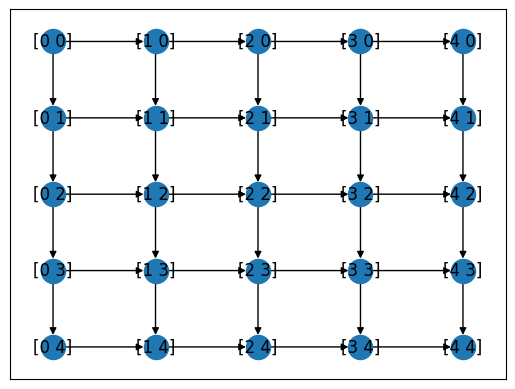

In [103]:


nodes = np.stack(np.indices((5,5)), axis = 2).reshape((-1,2))

def string_list_to_real(the_string):
    return eval(','.join(the_string.split()))



edges = []
for node1 in nodes:
    for node2 in nodes:
        #make rights
        if node1[0] == node2[0] and node1[1] + 1 == node2[1]:
            edges.append([node1, node2])
        #make downs
        if node1[0] + 1 == node2[0] and node1[1] == node2[1]:
            edges.append([node1, node2])

edges = list(map( lambda x: [str(x[0]), str(x[1])], edges))


string_nodes = np.unique(np.array(edges)).reshape(-1)

g = nx.from_edgelist(edges, create_using=nx.DiGraph)



positions = list(map( string_list_to_real, string_nodes))
positions = [ [x, -y] for x,y in positions ]
positions = dict(zip(string_nodes, positions))
positions


nx.draw_networkx(g, pos = positions)
plt.show()



In [104]:
get_two_path_node_to_end(g, (5,5))

([], [])

In [105]:
get_minimum_cost(g, costs, (5,5))

2707

In [106]:
find_min_cost_path(g, costs, (5,5))

(<networkx.classes.digraph.DiGraph at 0x19b69cab850>,
 ['[0 0]',
  '[0 1]',
  '[0 2]',
  '[0 3]',
  '[0 4]',
  '[1 4]',
  '[2 4]',
  '[3 4]',
  '[4 4]'])

# Solving the big problem

In [80]:
import io

with io.open('./0081_matrix.txt', 'r') as file:
    the_text = file.read()

the_matrix = np.array(list(map( lambda x: x.split(','), the_text.split())), dtype =(int))

In [82]:
print('building costs')
cost_matrix = the_matrix
le_index = np.stack(np.indices((80,80)), axis = 2).reshape((-1,2))
le_index = [str(thing).replace('[ ','[') for thing in le_index ]
costs = dict(zip(le_index, cost_matrix.reshape(-1)))


nodes = np.stack(np.indices((80,80)), axis = 2).reshape((-1,2))

print('making edges')

#extremely inefficient.
edges = []
for node1 in nodes:
    for node2 in nodes:
        #make rights
        if node1[0] == node2[0] and node1[1] + 1 == node2[1]:
            edges.append([node1, node2])
        #make downs
        if node1[0] + 1 == node2[0] and node1[1] == node2[1]:
            edges.append([node1, node2])

edges = list(map( lambda x: [str(x[0]).replace('[ ','['), str(x[1]).replace('[ ','[')], edges))


string_nodes = np.unique(np.array(edges)).reshape(-1)

print('building graph')
gbig = nx.from_edgelist(edges, create_using=nx.DiGraph)


print('making draw positions')
positions = list(map( string_list_to_real, string_nodes))
positions = [ [x, -y] for x,y in positions ]
positions = dict(zip(string_nodes, positions))
positions;


# nx.draw_networkx(g, pos = positions)
# plt.show()



building costs
making edges
building graph
making draw positions


In [84]:
%time
min_cost_path = find_min_cost_path(gbig, costs, grid_shape = (80,80), verbose=True)

CPU times: total: 0 ns
Wall time: 0 ns



KeyboardInterrupt

